<h1 style="text-align:center">El Oscilador Armónico en Mecánica Cuántica<br/><small>Solución Numérica</small><br/></h1>

<div style="text-align:center">
<strong>Martín Josemaría Vuelta Rojas</strong><br/>
<code><a href="https://github.com/zodiacfireworks" target="_blank">@zodiacfireworks</a></code><br/><br/>

<em>Universidad Nacional Mayor de San Marcos</em><br/>
Facultad de Ciencias Físicas<br/>
<code>(martin.vuelta@unmsm.edu.pe)</code><br/><br/>

<em>SoftButterfly</em><br/>
CTO<br/>
<code>(martin.vuelta@softbutterfly.io)</code><br/><br/>

<i>Hack Space</i><br/>
Trainer<br/>
<code>(martin.vuelta@hackspace.pe)</code>
</div>

In [1]:
%matplotlib inline

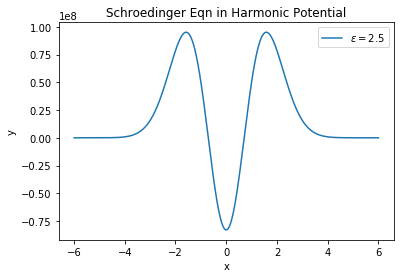

In [6]:
'''
--- Title:      Schroedinger Equation in Harmonic Potential
--- Author:     Matt Evans (mtdevans.com)
--- Copyright:  Do what you want with it.

This program basically just draws the functions for a
given value of epsilon. Epsilon should be an integer n+1/2
for good solutions.
'''

import pylab as lab
import math

N = 60000 # iterations

h = 0.0001
h2 = pow(h,2)

epsilon = 2.5 # n+1/2

y = 0.0
k = 0.0
x = -1*(N-2)*h

k_minus_2 = epsilon + x-2*h # k_0
k_minus_1 = epsilon + x-h # k_1
a = 0.1
y_minus_2 = 0 # y_0
y_minus_1 = a # y_1

x_out = []
y_out = []

n=-1*N+2

while n<N-2:
  n+=1
  x += h;
  k = 2*epsilon - pow(x, 2)
  b = h2/12
  y = ( 2*(1-5*b*k_minus_1) * y_minus_1 - (1+b*k_minus_2) * y_minus_2 ) / (1 + b * k)

  # Save for plotting
  x_out.append(x)
  y_out.append(y)

  # Shift for next iteration
  y_minus_2 = y_minus_1
  y_minus_1 = y
  k_minus_2 = k_minus_1
  k_minus_1 = k


# Plot
lab.figure(1)
lab.plot(x_out, y_out, label="$\epsilon = "+repr(epsilon)+"$")
lab.xlabel("x")
lab.ylabel("y")
lab.title("Schroedinger Eqn in Harmonic Potential")
lab.legend(loc=1)
lab.show()

nl, nr 502 502
0.02
86.5 0


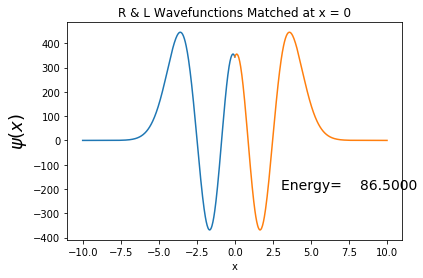

89.25 1


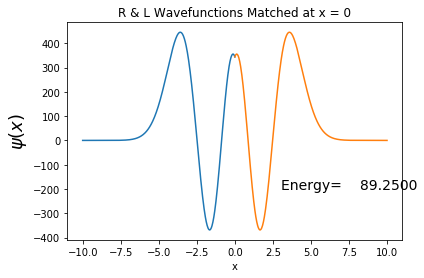

87.875 2


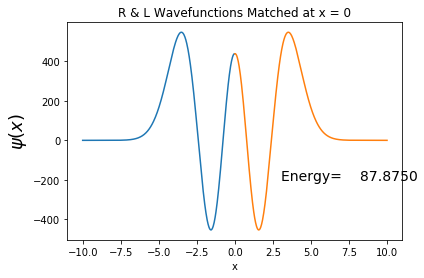

88.5625 3


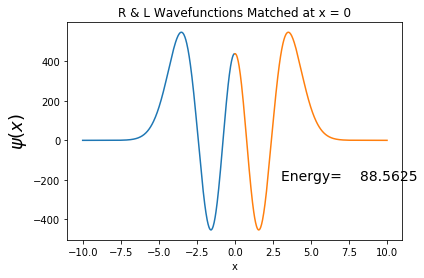

88.90625 4


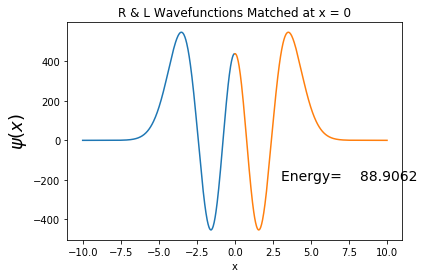

88.734375 5


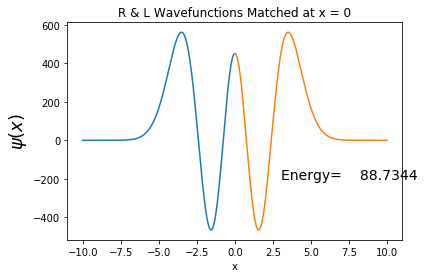

88.8203125 6


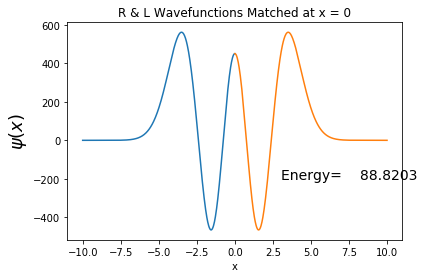

88.77734375 7


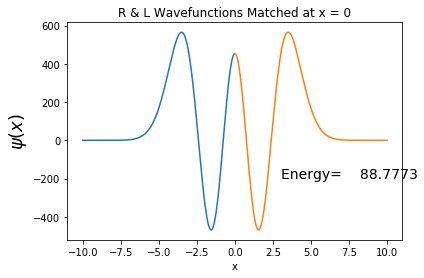

88.798828125 8


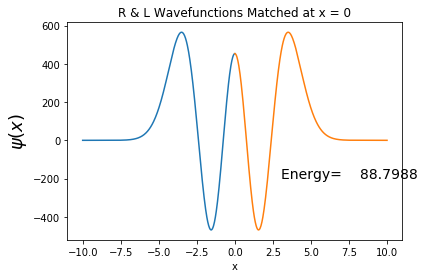

88.7880859375 9


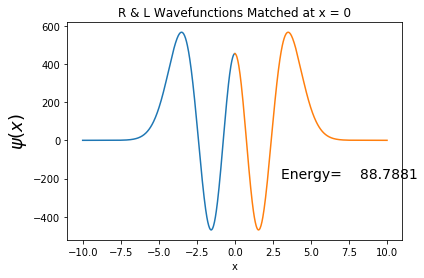

88.79345703125 10


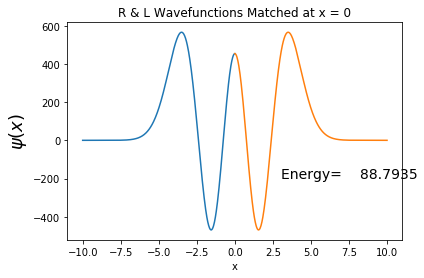

88.790771484375 11


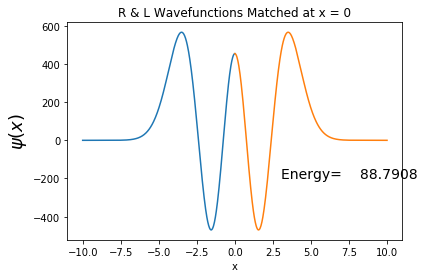

88.7894287109375 12


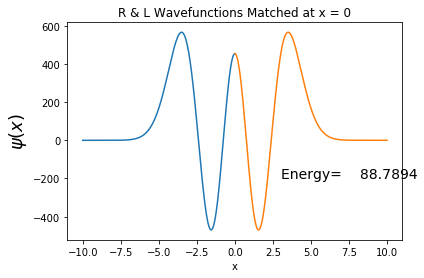

88.79010009765625 13


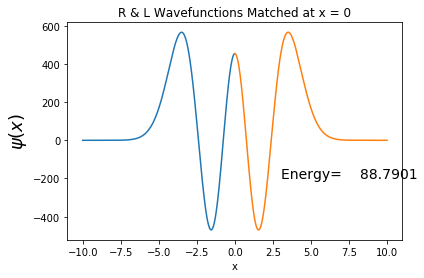

88.78976440429688 14


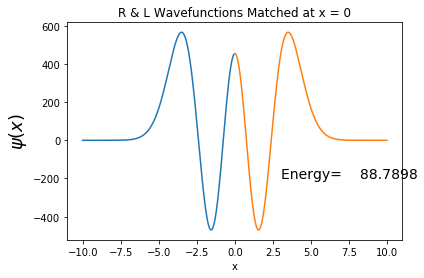

In [2]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# QuantumNumerov.py: quantum bound state via Numerov algorithm
# General method, but here for HO V(x)= 9.4*x*x/2
# hbarc* omega=hbarc*sqrt(k/m)=19.733,  r mc**2=940 MeV, k=9.4
# E =(N+1/2)hbarc*omega = (N+1/2)19.733, N even, change N odd 

from numpy import *
import numpy as np, matplotlib.pyplot as plt

n = 1000; 
m = 2;  
imax = 100;  
Xleft0 = -10; 
Xright0 = 10
h = 0.02; 
amin = 81.; 
amax = 92.;  
e = amin;  
de = 0.01
eps =  1e-4; 
im = 500; 
nl = im + 2;  
nr = n - im + 2
xmax = 5.0                    
print("nl, nr",nl, nr)
print(h)

xLeft = arange(-10,0.02,0.02); 
xRight = arange(10,0.02,-0.02)
xp = arange(-10,10,0.02)         # Bisection interval
uL =  zeros((503),float);
uR =  zeros([503],float)
k2L = zeros([1000],float);
k2R = zeros([1000],float)       
uL[0] = 0; uL[1] =0.00001;
uR[0] = 0; uR[1] = 0.00001                  

def V(x):                    # Potential harmonic oscillator
    v = 4.7*x*x                  
    return v

def setk2(e):                # Sets k2L=(sqrt(e-V))^2 and k2R 
    for i in range(0,n):         
       xLeft = Xleft0 + i*h
       xr = Xright0 - i*h
       fact=0.04829  # 2 m*c**2/hbarc**2=2*940/(197.33)**2
       k2L[i] = fact*(e-V(xLeft))
       k2R[i] = fact*(e-V(xr))

def Numerov(n,h,k2,u,e):            
    setk2(e)
    b=(h ** 2) / 12.0                                # L & R Psi
    for i in range( 1,n):  
        u[i+1]=(2 * u[i] * (1 - 5. * b * k2[i]) - (1 + b * k2[i-1]) * u[i-1]) / (1 + b * k2[i+1])

def diff(e):
   Numerov(nl,h,k2L,uL,e)              # Left wf
   Numerov(nr,h,k2R,uR,e)              # Right wf
   f0 = (uR[nr-1] + uL[nl-1] - uR[nr-3] - uL[nl-3]) / (h*uR[nr-2])
   return f0

istep = 0
x1 = arange(-10,.02,0.02);   
x2 = arange(10,-0.02,-0.02)
fig = plt.figure()                        
ax = fig.add_subplot(111)
ax.grid()

while abs(diff(e)) > eps :       # Bisection algorithm
    e =(amin + amax)/2                
    print(e,istep)
    if diff(e)*diff(amax) > 0: amax = e  
    else: amin = e
    ax.clear()   
    plt.text(3,-200,'Energy= %10.4f'%(e),fontsize=14)
    plt.plot(x1,uL[:-2])
    plt.plot(x2,uR[:-2])
    plt.xlabel('x')
    plt.ylabel('$\psi(x) $',fontsize=18)
    plt.title('R & L Wavefunctions Matched at x = 0')
    istep = istep+1    
    plt.pause(0.8)  # Pause to delay figures
plt.show() 